

# Project: Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> We will be exploring the soccer dataset through the data analytical process and analyze some questions that different graphs. The raw data is given in a sqlite file. It contains data from 2008 to 2016 matches, players and teams of different Leagues across the world. We will look through each table and take all the useful information we would require to analyze our questions and provide suitable conclusions. The following questions will be analyzed.

- Show the players that have improved the most since 2008 to 2015?
- Which are the top 10 players in 2016?
- Which are the most highly rated players since 2008 to 2016 ?
- Compare the total matched played in each league per year? Is there any variation? If so, Why?
- Which are the toughest teams to play at their home ground?
- Which are the toughest teams to play in your home ground?
- Which are the top teams between 2008 to 2016 who have the highest number of goals?
- Which team has the most number of Wins from 2008 to 2016?


<a id='Import'></a>
### Importing the required packages

> Here we will import the required documents for our analysis. We will be using sqlalchemy package for unpacking the sqlite dataset. We will also be focusing on the seaborn package for plotting our data.

In [44]:

#Importing the required datasets
from sqlalchemy import create_engine, Table, MetaData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Here we import sqlite data, make a connection, what all data it contains, import the required table and analyze the tables.
- Create an engine
- Making a connection
- Making an empty Metadata
- Calling the necessary Tables
- Subsetting the dataset with a query
- Fetching the data
- Making it into a dataframe
- Making a local copy for exploring in Excel

### General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
engine = create_engine('sqlite:///database.sqlite')
print(engine.table_names())

# Create a connection on engine
connection = engine.connect()

# Create a metadata object: metadata
metadata = MetaData()

# Reflect table from the engine: 
country= Table('Country', metadata, autoload=True,autoload_with=engine)
league= Table('League', metadata, autoload=True, autoload_with=engine)
match= Table('Match', metadata, autoload=True, autoload_with=engine)
player= Table('Player', metadata, autoload=True, autoload_with=engine)
player_att= Table('Player_Attributes', metadata, autoload=True, autoload_with=engine)
team= Table('Team', metadata, autoload=True, autoload_with = engine)
team_att= Table('Team_Attributes', metadata, autoload=True, autoload_with=engine)


# Print the column names:
print(country.columns.keys())
print(league.columns.keys())
print(match.columns.keys())
print(player.columns.keys())
print(player_att.columns.keys())
print(team.columns.keys())
print(team_att.columns.keys())

# Query:
stmt1 = 'SELECT * from Country'
stmt2 = 'SELECT * from League'
stmt3 = 'SELECT * from Match'
stmt4 = 'SELECT * from Player'
stmt5 = 'SELECT * from Player_Attributes'
stmt6 = 'SELECT * from Team'
stmt7 = 'SELECT * from Team_Attributes'

# Print full metadata of the tables:
c = connection.execute(stmt1).fetchall()
l = connection.execute(stmt2).fetchall()
m = connection.execute(stmt3).fetchall()
p = connection.execute(stmt4).fetchall()
p_att = connection.execute(stmt5).fetchall()
t = connection.execute(stmt6).fetchall()
t_att = connection.execute(stmt7).fetchall()

# Create a DataFrame from the results: df
df_c = pd.DataFrame(c)
df_l = pd.DataFrame(l)
df_m = pd.DataFrame(m)
df_p = pd.DataFrame(p)
df_patt = pd.DataFrame(p_att)
df_t = pd.DataFrame(t)
df_tatt = pd.DataFrame(t_att)


# Set column names of the data as the keys of the respective Table
df_c.columns = c[0].keys()
df_l.columns = l[0].keys()
df_m.columns = m[0].keys()
df_p.columns = p[0].keys()
df_patt.columns = p_att[0].keys()
df_t.columns = t[0].keys()
df_tatt.columns = t_att[0].keys()

# Set as csv file to store locally
df_c.to_csv('country.csv', index = False)
df_l.to_csv('league.csv', index = False)
df_m.to_csv('match.csv', index = False)
df_p.to_csv('player.csv', index = False)
df_patt.to_csv('player_att.csv', index = False)
df_t.to_csv('team.csv', index = False)
df_tatt.to_csv('team_att.csv', index = False)


['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes', 'sqlite_sequence']
['id', 'name']
['id', 'country_id', 'name']
['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away

### Cleaning the dataset

> Lets look into the dataset so that
- We can remove unnecessary data
- Check for NaN's
- Change the date to datetime

 - Player Data

In [17]:
player_info = ['player_api_id','player_name',]
df_p = df_p[player_info]
print(df_p.isna().sum())
print(df_p.info())
df_p.head()


player_api_id    0
player_name      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   player_api_id  11060 non-null  int64 
 1   player_name    11060 non-null  object
dtypes: int64(1), object(1)
memory usage: 172.9+ KB
None


,player_api_id,player_name
0,505942,Aaron Appindangoye
1,155782,Aaron Cresswell
2,162549,Aaron Doran
3,30572,Aaron Galindo
4,23780,Aaron Hughes


 - Player Attribute Data

In [18]:
player_att_info = ['player_api_id', 'date', 'overall_rating']
df_patt = df_patt[player_att_info]
df_patt.date = pd.to_datetime(df_patt.date)
print(df_patt.isna().sum())
print(df_patt.info())
df_patt.head()



player_api_id       0
date                0
overall_rating    836
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_api_id   183978 non-null  int64         
 1   date            183978 non-null  datetime64[ns]
 2   overall_rating  183142 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.2 MB
None


,player_api_id,date,overall_rating
0,505942,2016-02-18,67.0
1,505942,2015-11-19,67.0
2,505942,2015-09-21,62.0
3,505942,2015-03-20,61.0
4,505942,2007-02-22,61.0


 - Countries and League Dataset

In [24]:
print(df_c.info())
print(df_c.isna().sum())
print(df_c.shape)

print(df_l.info())
print(df_l.isna().sum())
print(df_l.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
None
id      0
name    0
dtype: int64
(11, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None
id            0
country_id    0
name          0
dtype: int64
(11, 3)


 - Matches Dataset



In [26]:
print(df_m.info())
print(df_m.isna().sum())
print(df_m.shape)

df_m_drop = df_m.drop([ 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],axis = 1)
df_m_drop.date = pd.to_datetime(df_m_drop.date)
df_m_drop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64
(25979, 115)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


### Merging Datasets
> We will further explore the dataset so as to
- remove unnecessary columns
- rename new merged datasets

- Merging Player and Player Attribute Data

In [19]:
df_pm = pd.merge(df_patt, df_p, on = 'player_api_id')
print(df_pm.isna().sum())
print(df_pm.info())
df_pm.head()

player_api_id       0
date                0
overall_rating    836
player_name         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_api_id   183978 non-null  int64         
 1   date            183978 non-null  datetime64[ns]
 2   overall_rating  183142 non-null  float64       
 3   player_name     183978 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.0+ MB
None


,player_api_id,date,overall_rating,player_name
0,505942,2016-02-18,67.0,Aaron Appindangoye
1,505942,2015-11-19,67.0,Aaron Appindangoye
2,505942,2015-09-21,62.0,Aaron Appindangoye
3,505942,2015-03-20,61.0,Aaron Appindangoye
4,505942,2007-02-22,61.0,Aaron Appindangoye



- Merging Country and League Data


In [23]:
df_cl = pd.merge(df_c,df_l,on = 'id')
df_cl.rename(columns={'name_x':'Country', 'name_y':'League'}, inplace = True)
df_cl = df_cl.drop(['country_id'], axis = 1)

- Merging Matches dataset with the Merged Countries and League Dataset

In [27]:
df_mcl = pd.merge(df_m_drop,df_cl, left_on='country_id', right_on='id')
df_mcl = df_mcl.drop(['id_x','league_id','id_y'], axis = 1)
df_mcl.head()

,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Country,League
0,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


- Merging Match, country, league dataset with Team Dataset

In [28]:
df_mt = pd.merge(df_mcl,df_t, left_on='home_team_api_id', right_on= 'team_api_id')
df_mt.drop(['team_short_name', 'team_fifa_api_id','id','match_api_id'],axis = 1, inplace = True)
df_mt.head()

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Country,League,team_api_id,team_long_name
0,1,2008/2009,1,2008-08-17,9987,9993,1,1,Belgium,Belgium Jupiler League,9987,KRC Genk
1,1,2008/2009,12,2008-11-15,9987,9999,1,1,Belgium,Belgium Jupiler League,9987,KRC Genk
2,1,2008/2009,14,2008-11-29,9987,9984,3,2,Belgium,Belgium Jupiler League,9987,KRC Genk
3,1,2008/2009,16,2008-12-13,9987,9986,1,0,Belgium,Belgium Jupiler League,9987,KRC Genk
4,1,2008/2009,19,2009-01-24,9987,9998,2,0,Belgium,Belgium Jupiler League,9987,KRC Genk


<a id='eda'></a>
## Exploratory Data Analysis

> It is time to explore our data and answer some questions about the data given below. We will go through the analysis step by step and provide the necessary data



### Show the players that have improved the most since 2008 to 2015?

> There are many players who have improved their overall rating and progressed in their career. Here we are going to see the players who have improved the most between the years of 2008 to 2015. 
- We will start by subsetting the player/team merged dataframe by finding the difference of overall rating of each player
- We will then plot this increase for the top 10 most improved players 


                player_name  overall_rating
6585             Marco Reus            42.0
3388  Francesco Della Rocca            39.0
1063            Bakary Sako            38.0
8739      Ricardo Rodriguez            38.0
2782            Eden Hazard            38.0
8531       Radja Nainggolan            37.0
9321            Scott Brown            37.0
8042        Oscar de Marcos            37.0
5973       Leonardo Bonucci            36.0
2187             Danny Ings            36.0


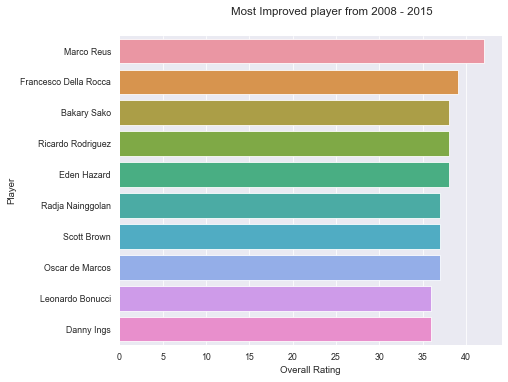

In [58]:
# Making a new dataframe showing the increase in overall rating
df_pm_change = df_pm.groupby('player_name')['overall_rating'].max() - df_pm.groupby('player_name')['overall_rating'].min()
df_pm_change = pd.DataFrame(df_pm_change)
df_pm_change = df_pm_change.reset_index().sort_values('overall_rating',axis = 0, ascending=False).head(10)

print(df_pm_change)

# Plotting out findings
sns.set_style('darkgrid')
sns.set_palette('Purples')
sns.set_context('paper')
g = sns.catplot(x = 'overall_rating', y = 'player_name', data = df_pm_change, kind = 'bar', aspect=14.7/10.27)

# Labelling the plot
g.fig.suptitle('Most Improved player from 2008 - 2015', x = 0.65, y = 1.05)
g.set(xlabel = 'Overall Rating', ylabel = 'Player')
plt.show()

> Conclusions
- It looks like Marco Reus has shown the highest improvement with over a 40+ point overall increase.

### Which are the top 10 players in 2016?

> This question is pretty straight forward. This will be based once again on the overall rating of the players.
- We have made a function that gives us the top 10 players of each year.
- From this we have made a graph that shows the same through seaborn


In [56]:
def best_player(df, year, n=10):
    df_year = df[df.date.dt.year == year].sort_values('date').groupby('player_api_id').last()
    #print(df_year.head(n))
    
    df_answer = df_year.loc[:,['date','overall_rating','player_name',]]
    #print(df_answer.head(n))
    
    df_answer = df_answer.sort_values('overall_rating', ascending = False)
    df_answer = df_answer.reset_index().drop('player_api_id', axis = 1)
    #print(df_answer.head(n))
    
    df_answer['rank'] = df_answer.index
    df_answer = df_answer.set_index('rank')
    
    return df_answer.head(n)

# Lets see the data for 2016
best_player(df_pm,2016,n = 10)


,date,overall_rating,player_name
rank,,,
0,2016-02-04,90.0,Neymar
1,2016-04-21,90.0,Manuel Neuer
2,2016-01-28,89.0,Arjen Robben
3,2016-03-10,88.0,Sergio Aguero
4,2016-01-28,88.0,Eden Hazard
5,2016-01-28,88.0,Robert Lewandowski
6,2016-02-18,88.0,Mesut Oezil
7,2016-01-14,87.0,Jerome Boateng
8,2016-04-21,87.0,David De Gea


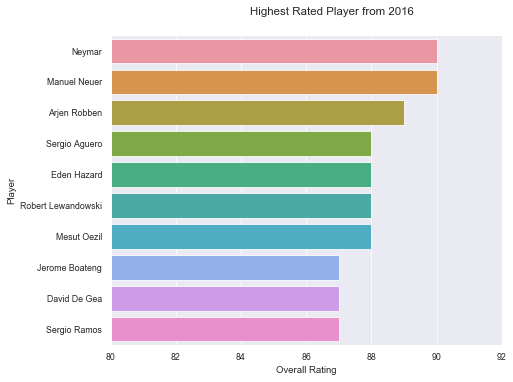

In [59]:
# Assign a variable
d = best_player(df_pm,2016,n = 10)

# Lets plot the graph
sns.set_style('darkgrid')
sns.set_palette('Purples')
sns.set_context('paper')

g = sns.catplot(y ='player_name', x = 'overall_rating', data = d, kind = 'bar', aspect=14.7/10.27);

# Labelling
g.fig.suptitle('Highest Rated Player from {}'.format(d.date.dt.year.loc[1]), x = 0.65, y = 1.05);
g.set(xlabel = 'Overall Rating', ylabel = 'Player');
plt.xlim(80, 92, 2)
plt.show()


Conclusion
> We can see that Neymar and Manuel Neuer are seen to be the highest rated played of 2016 with an overall rating of 90 each.

### Which are the most highly rated players since 2008 to 2016 ?

> Here we have to determine the most highly rated players each season. Once we do that, we can see the highly rated players spread across different seasons in a graph. This will include players who have rated highly in multiple seasons.
- Below we have made a loop for determining the dataframe from the top 3 players for each season.
- Further below the graph has been made for our analysis.

In [102]:
time = [2008,2009,2010,2011,2012,2013,2014,2015]

y = pd.DataFrame()
for b in range(7):
    x = best_player(df_pm,time[b],n = 5).loc[0:3]
    y = y.append(x)

y


,date,overall_rating,player_name
rank,,,
0,2008-08-30,91.0,Cristiano Ronaldo
1,2008-08-30,91.0,Iker Casillas
2,2008-08-30,90.0,Gianluigi Buffon
3,2008-08-30,90.0,Kaka
0,2009-08-30,90.0,Lionel Messi
1,2009-08-30,90.0,Iker Casillas
2,2009-08-30,89.0,Julio Cesar
3,2009-08-30,89.0,Cristiano Ronaldo
0,2010-08-30,90.0,Lionel Messi


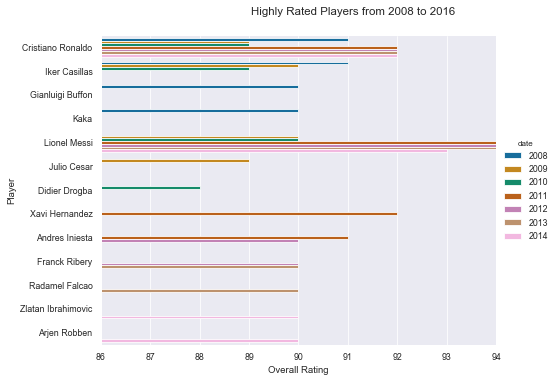

In [103]:
# Taking on the year in the date column
y.date = y.date.dt.year

# Plotting the graph
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set_context('paper')
g =sns.catplot(x='overall_rating', y ='player_name', data =y,hue = 'date', kind ='bar', aspect=14.7/10.27)

# Labelling the plot
g.fig.suptitle('Highly Rated Players from 2008 to 2016 ', x = 0.65, y = 1.05)
g.set(xlabel = 'Overall Rating', ylabel = 'Player')
plt.xlim(86, 94, 2)
plt.show()


### Compare the total matched played in each league per year? Is there any variation? If so, Why?

>  Here we find the total matches playes in each league per season.
- The Match, Country and League merged dataset is used and then grouped by league and season. The stage column in the dataset shows the matches which can be summed to obtain the total number of matches.

In [106]:

# Data is grouped
c = df_mcl.groupby(['League','season']).stage.count().sort_values(ascending = False)
c = pd.DataFrame(c).rename(columns = {'stage':'total_matches'})
c = c.reset_index()


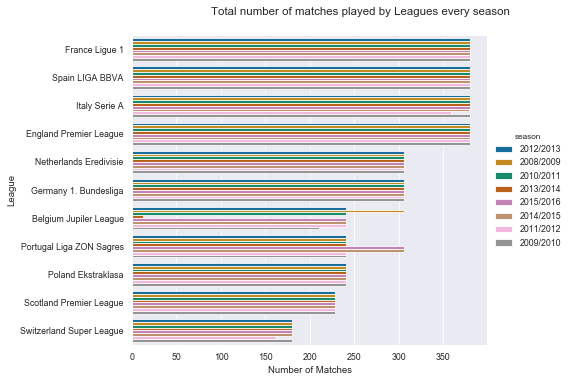

In [105]:
# Lets plot
g = sns.catplot(y = 'League', x = 'total_matches', data = c, hue = 'season', kind = 'bar', aspect=14.7/10.27 )
g.fig.suptitle('Total number of matches played by Leagues every season', x = 0.65, y = 1.05)
g.set(xlabel = 'Number of Matches', ylabel = 'League')
plt.show()

Conclusion
> We can see the total number of matchesper leagues from 2008 to 2016
- This is not same for all the leagues since the number of teams in each league is different.
- We can also see some outliers in the dataset which could be due to error in reporting or extenuous circumstances of the league in question for that particular year.

### Which are the toughest teams to play at their home ground?

>  Soccer is a game where the team with the most goals win. To answer this question we need to find the teams that score most at their home ground
- The merged match/team dataset is used and the sum of home team goals is taken with respect to the season and team name.
- Then we can plot to see the teams that score a high amount of goals in their own home ground.

In [107]:
# Lets subset the data with respect to home team goal
home_goals = df_mt.groupby(['team_long_name','season'])['home_team_goal'].sum().sort_values(ascending = False).head(30)
home_goals = pd.DataFrame(home_goals)
home_goals = home_goals.reset_index()

home_goals.head()


,team_long_name,season,home_team_goal
0,FC Barcelona,2011/2012,73
1,Real Madrid CF,2015/2016,70
2,Real Madrid CF,2011/2012,70
3,Chelsea,2009/2010,68
4,Real Madrid CF,2012/2013,67


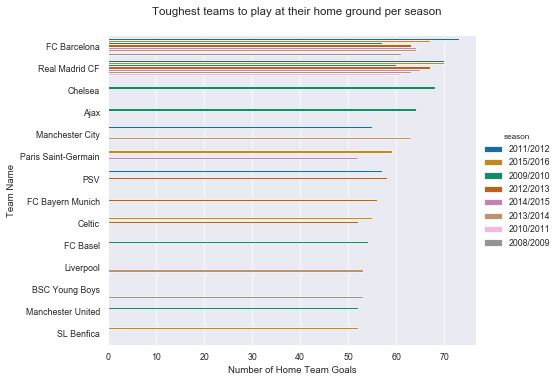

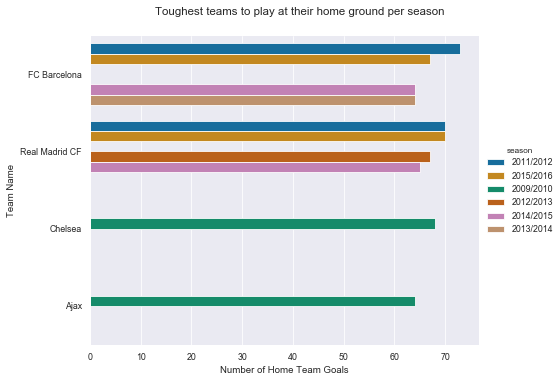

In [123]:
#Plotting the graphs
g = sns.catplot(x = 'home_team_goal', y = 'team_long_name', data = home_goals, kind = 'bar', hue='season', aspect=15.7/11.27);
g.fig.suptitle('Toughest teams to play at their home ground per season', x = 0.55, y = 1.05);
g.set(xlabel = 'Number of Home Team Goals', ylabel = 'Team Name')

# Labelling
g = sns.catplot(x = 'home_team_goal', y = 'team_long_name', data = home_goals.head(10), kind = 'bar', hue='season', aspect=15.7/11.27);
g.fig.suptitle('Toughest teams to play at their home ground per season', x = 0.55, y = 1.05);
g.set(xlabel = 'Number of Home Team Goals', ylabel = 'Team Name');

Conclusion
> Be extremely careful if you going to any the home stadiums for the above teams. The chances of them scoring are extremely high.

### Which are the toughest teams to play in your home ground?
> This is a very interesting question. A lot of teams usually have a home advantage when playing against other teams. The analysis below shows the worst teams you want to play at your home stadies since the score goals nonetheless
- Like the previous exercise we subset values from the merged match/team dataset and sum the away team goals
- Plot the resulting graph


In [114]:
# Merging the required dataframes
df_mta = pd.merge(df_mcl,df_t, left_on='away_team_api_id', right_on= 'team_api_id')
df_mta.drop(['team_short_name', 'team_fifa_api_id','id','match_api_id'],axis = 1, inplace = True)
df_mta.head()

# Use the away team goals and assign it to away_goals
away_goals = df_mta.groupby(['team_long_name', 'season'])['away_team_goal'].sum().sort_values(ascending = False).head(30)
away_goals = pd.DataFrame(away_goals)
away_goals = away_goals.reset_index()
away_goals.head()

,team_long_name,season,away_team_goal
0,Real Madrid CF,2014/2015,53
1,Celtic,2013/2014,52
2,FC Barcelona,2012/2013,52
3,Real Madrid CF,2011/2012,51
4,FC Barcelona,2010/2011,49


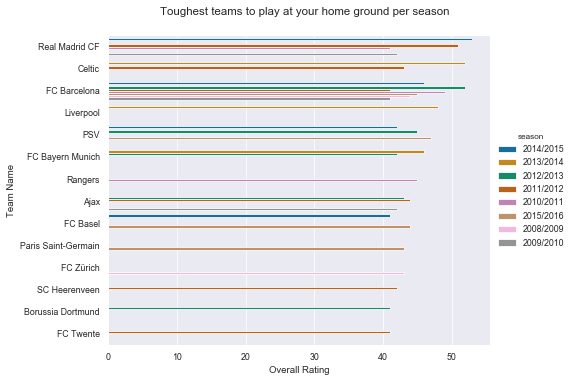

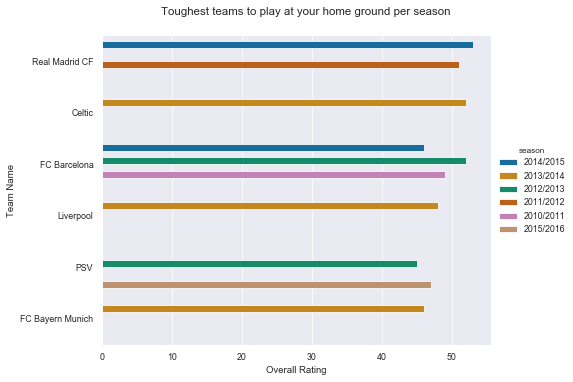

In [115]:
# Plotting the graph

g = sns.catplot(x = 'away_team_goal', y = 'team_long_name', data = away_goals, kind = 'bar', hue='season', aspect=14.7/10.27);
g.fig.suptitle('Toughest teams to play at your home ground per season', x = 0.55, y = 1.05);
g.set(xlabel = 'Overall Rating', ylabel = 'Team Name')

# Labelling the graph

g = sns.catplot(x = 'away_team_goal', y = 'team_long_name', data = away_goals.head(10), kind = 'bar', hue='season', aspect=14.7/10.27);
g.fig.suptitle('Toughest teams to play at your home ground per season', x = 0.55, y = 1.05);
g.set(xlabel = 'Overall Rating', ylabel = 'Team Name')


Conclusion
> Be extremely careful if these teams are coming to your stadium. We though we will have an home advantage, the chances of the above teams scoring will be high.

### Which are the top teams between 2008 to 2016 who have the highest number of goals?
> This can be easily achieved
- We add the total goals from home goals and away goals
- We plot the graphs

In [119]:
# Total Goal tally
home_goals['total_goals'] = home_goals['home_team_goal'] + away_goals['away_team_goal']
home_goals.head()

,team_long_name,season,home_team_goal,total_goals
0,FC Barcelona,2011/2012,73,126
1,Real Madrid CF,2015/2016,70,122
2,Real Madrid CF,2011/2012,70,122
3,Chelsea,2009/2010,68,119
4,Real Madrid CF,2012/2013,67,116


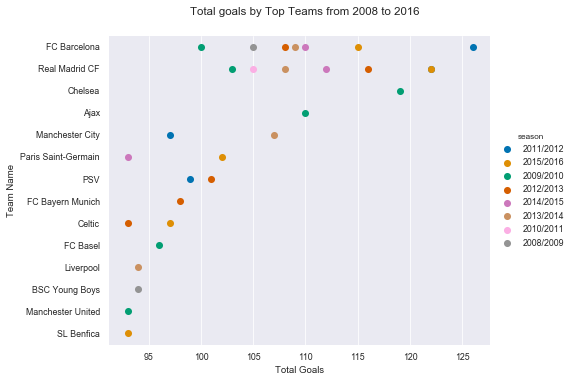

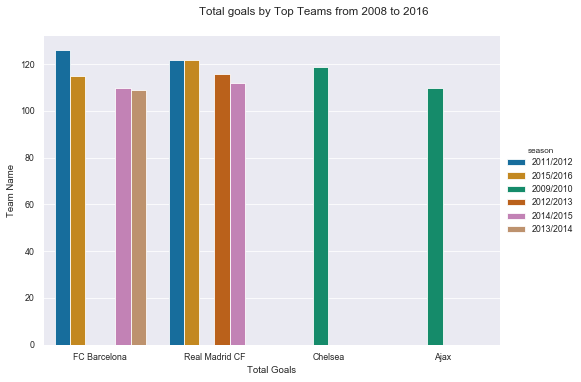

In [122]:
# Plot the teams with the highest goals for each season

g = sns.catplot(x = 'total_goals', y = 'team_long_name', data = home_goals,kind = 'point', hue = 'season', join = False, aspect=14.7/10.27);
g.fig.suptitle('Total goals by Top Teams from 2008 to 2016', x = 0.55, y = 1.05);
g.set(xlabel = 'Total Goals', ylabel = 'Team Name')

g = sns.catplot(y = 'total_goals', x = 'team_long_name', data = home_goals.head(10),kind = 'bar', hue = 'season', aspect=14.7/10.27);
g.fig.suptitle('Total goals by Top Teams from 2008 to 2016', x = 0.55, y = 1.05);
g.set(xlabel = 'Total Goals', ylabel = 'Team Name')

Conclusion
> It seems like the above teams are extremely attacking and prefer and are known for goal scoring in their respective seasons.

### Which team has the most number of Wins from 2008 to 2016?

In [126]:
# Making the dataframe from scratch
df_mtx = pd.read_csv('df_results.csv')

k = pd.DataFrame(df_mtx.groupby(['result','season']).result.count()).rename(columns = {'result':'Wins'}).reset_index().sort_values('Wins',ascending = False).reset_index().drop('index', axis =1)
k = k[k['Wins'] <700].reset_index()
k.drop('index', axis=1, inplace = True)
k = k.rename(columns={'result':'Team Name'})
k.head()

,Team Name,season,Wins
0,Juventus,2013/2014,33
1,Real Madrid CF,2011/2012,32
2,FC Barcelona,2012/2013,32
3,Celtic,2013/2014,31
4,FC Barcelona,2009/2010,31


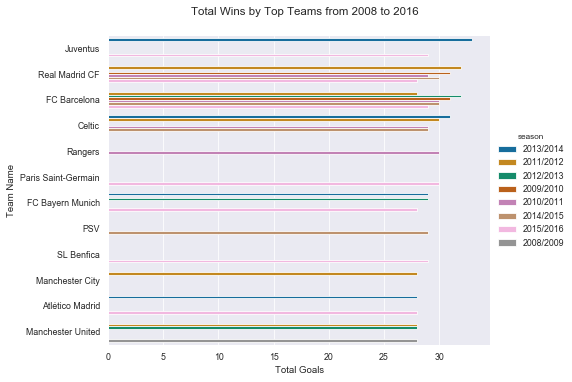

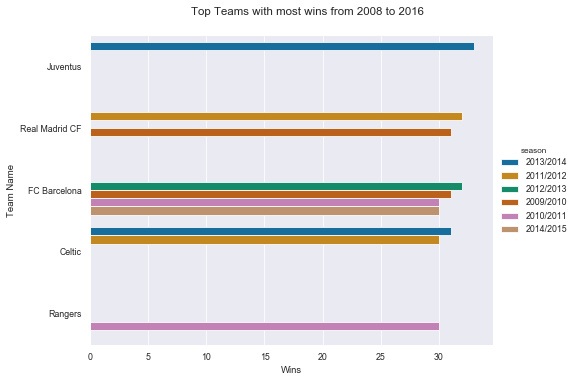

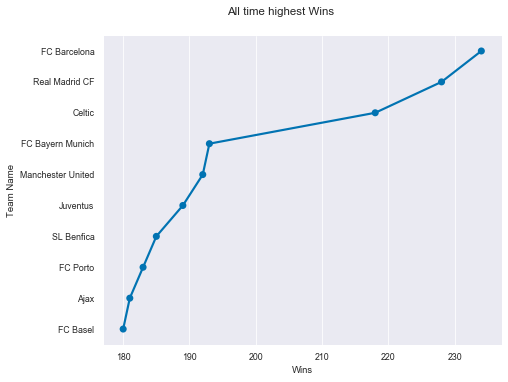

In [127]:
# Plotting the required graphs

# Plot 1
g = sns.catplot(x = 'Wins', y = 'Team Name', data = k.head(30), kind = 'bar', hue='season', aspect=14.7/10.27)
g.fig.suptitle('Total Wins by Top Teams from 2008 to 2016', x = 0.55, y = 1.05)
g.set(xlabel = 'Total Goals', ylabel = 'Team Name')
plt.show()

# Plot 2
sns.set_palette('colorblind')
g = sns.catplot(x = 'Wins', y = 'Team Name', data = k.head(10), kind = 'bar', hue='season', aspect=14.7/10.27)
g.fig.suptitle('Top Teams with most wins from 2008 to 2016', x = 0.55, y = 1.05)
plt.show()

# Plot 3
j = pd.DataFrame(k.groupby('Team Name').Wins.sum()).reset_index().sort_values('Wins', ascending = False)
sns.set_palette('colorblind')
g = sns.catplot(x = 'Wins', y = 'Team Name', data = j.head(10), kind = 'point', aspect=14.7/10.27)
g.fig.suptitle('All time highest Wins', x = 0.55, y = 1.05)
plt.show()



Conclusion
> It looks like Barcelona had the most number of wins followed by Real Madrid and Celtic. There are other factors that could weigh in when determining the win rate for the teams given above such as
- How strong is the league?
- Are all the teams equally rated or are more teams weaker then the best


<a id='conclusions'></a>
## Conclusions

> There are a few things that stand out in our analysis
- Messi and Ronaldo are the best players during the period of 2008 to 2016 with respect to rating.
- Barcelona and Real Madrid have scored the highest number of goals.
- Barcelone and Real Madrid have the highest number of wins.
- Juventus had the highest number of Wins in a single season.
- Marco Reus was the most improved player.

> The above analysis is a minor exploration of the dataset. We can surely improve our analysis when time permits further. This includes
- Player by Player analysis
- Team by Team analysis
- Predicting outcome of a match
- Common attributes of highly rated players


In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255